## Melbourne Housing Prices Data Project
## Nazeef Hamid 

### The data used in this project is from [Kaggle](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market)

In [4]:
using Pkg
Pkg.activate(".")

  Activating new project at `~/Documents/Courses/MATH2504/Project-3-Public/melbourne-housing`


In [6]:
using DataFrames, CSV, Statistics, Plots, StatsPlots, StatsBase, Dates, GLM, Images

### Task 1.1

We start by importing the dataset, making sure to place `missingstring`s where required.

In [7]:
csv_file = CSV.File("data/Melbourne_housing_FULL.csv"; missingstring  = ["#N/A",""]);
df = DataFrame(csv_file);

Having a list of the column names will be useful moving forward:

In [8]:
names(df)

21-element Vector{String}:
 "Suburb"
 "Address"
 "Rooms"
 "Type"
 "Price"
 "Method"
 "SellerG"
 "Date"
 "Distance"
 "Postcode"
 "Bedroom2"
 "Bathroom"
 "Car"
 "Landsize"
 "BuildingArea"
 "YearBuilt"
 "CouncilArea"
 "Lattitude"
 "Longtitude"
 "Regionname"
 "Propertycount"

#### Rooms

Let's start by looking at the number of rooms for different houses. I'm using the `summarystats` from StatsBase, which gives us a nice summary of the data. I'm also including  mode here, since I think it is also a useful statistic.

In [9]:
print(summarystats(df[:,:Rooms]))
print("Mode:           ", mode(df[:,:Rooms]))

Summary Stats:
Length:         34857
Missing Count:  0
Mean:           3.031012
Minimum:        1.000000
1st Quartile:   2.000000
Median:         3.000000
3rd Quartile:   4.000000
Maximum:        16.000000
Mode:           3

Next, I am plotting some histograms to visually represent the distribution of room numbers. I have one histogram with a regular scale, and one with a y axis log scale.

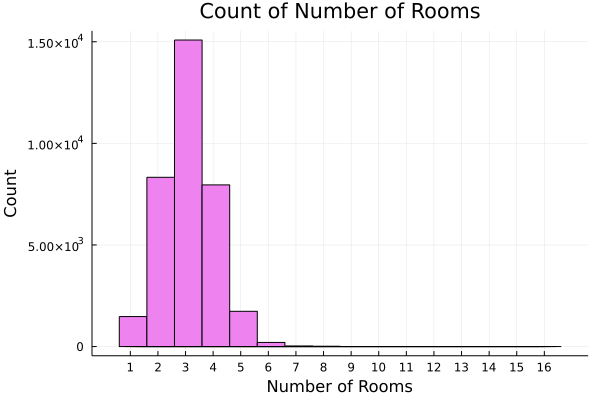

In [14]:
histogram(df[:,:Rooms],bar_width = 1, title = "Count of Number of Rooms", xlabel = "Number of Rooms", 
                       ylabel = "Count", legend = :none, color = :violet, xticks = (1:16), fmt = :png)

The most frequent room number is 3, as we saw earlier with the mode. It is more than double as frequent as its closest competitors. Clearly, the Melbourne housing market favours houses with about 2-4 rooms, with a houses having 1-5 rooms.

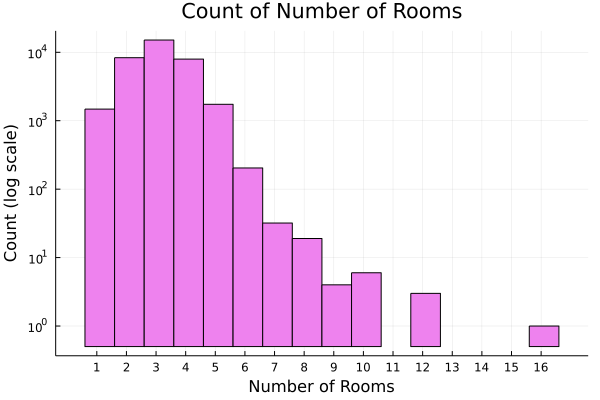

In [15]:
histogram(df[:,:Rooms],bar_width = 1, title = "Count of Number of Rooms", 
        xlabel = "Number of Rooms", ylabel = "Count (log scale)", legend = :none, color = 
        :violet, yaxis = :log, xticks = (1:16),fmt = :png)

This log histogram is better for showing the counts from the less frequent room numbers, since they are almost entirely hidden on the above graph. There are about 100 examples of 6 bedroom houses, then only around 10 for 7/8/9/10 bedroom houses.

#### House Prices

Once again, I am using `summarystats`, along with a histogram. This time I am not using the mode since it makes less sense to use here. Prices can be similar but slightly different, and the mode would not be able to detect that. Perhaps, if we placed the prices into bins and then took the mode, it would be useful

In [16]:
print(summarystats(df[:,:Price]))

Summary Stats:
Length:         34857
Missing Count:  7610
Mean:           1050173.344955
Minimum:        85000.000000
1st Quartile:   635000.000000
Median:         870000.000000
3rd Quartile:   1295000.000000
Maximum:        11200000.000000


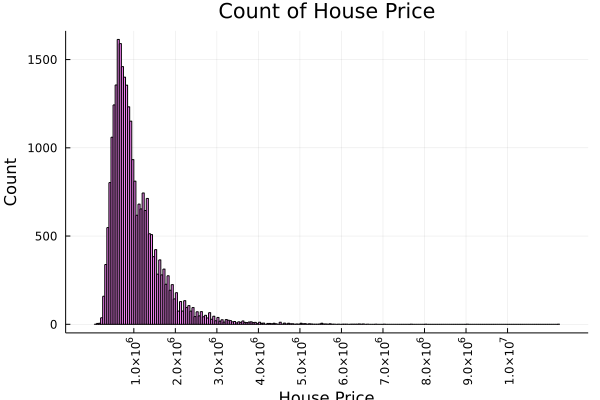

In [17]:
histogram(collect(skipmissing(df[:,:Price])),bins = 500, title = "Count of House Price", xlabel = "House Price",
        ylabel = "Count", legend = :none, color = :Violet, xticks = 10^6*collect(1:10), xrotation = 90, fmt = :png)

This graph seems to indicate that the most common prices are less than 1 million dollars, perhaps in the 600 to 700k region, with the vast majority of houses being sold for under 3 million dollars. 

#### Method

For this column, I created a pie chart since we have some categorial rather than numerical data to consider. I grouped the data by its Method, then counted the rows in each sub dataframe, and used this information to construct the pie chart 

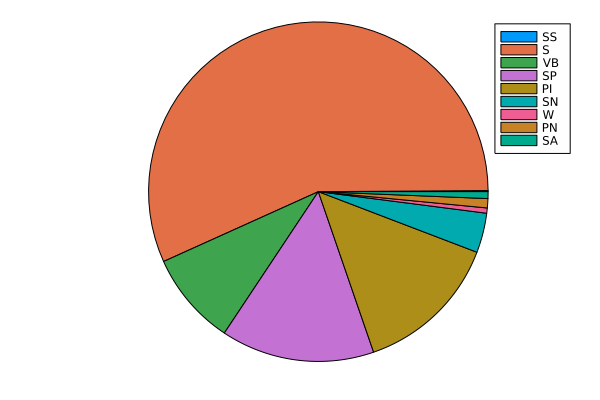

In [20]:
methodgroup = groupby(df, :Method)
df_method = combine(methodgroup, nrow => :CountofMethod)
df_method = transform(df_method, :Method => (s -> convert(Vector{String}, s)) => :Method)
df_method.CountofMethod
pie(df_method.Method, df_method.CountofMethod, fmt = :png)

#### Distance

In [21]:
print(summarystats(df[:,:Distance]))


Summary Stats:
Length:         34857
Missing Count:  1
Mean:           11.184929
Minimum:        0.000000
1st Quartile:   6.400000
Median:         10.300000
3rd Quartile:   14.000000
Maximum:        48.100000


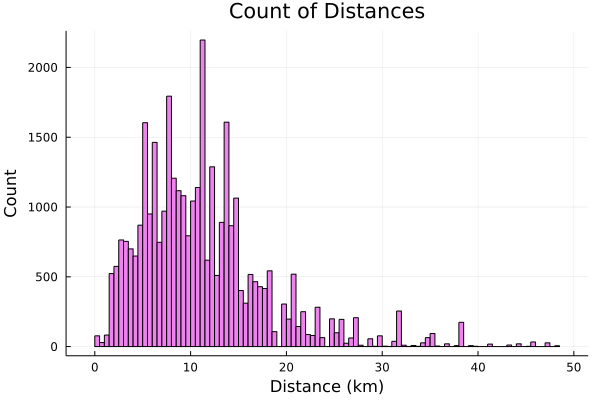

In [22]:
histogram(collect(skipmissing(df[:,:Distance])), title = "Count of Distances", xlabel = "Distance (km)", 
                    ylabel = "Count", color = :Violet, legend = :none, normed = false, fmt = :png)

#### Landsize

In [23]:
print(summarystats(df[:,:Landsize]))

Summary Stats:
Length:         34857
Missing Count:  11810
Mean:           593.598993
Minimum:        0.000000
1st Quartile:   224.000000
Median:         521.000000
3rd Quartile:   670.000000
Maximum:        433014.000000


In [24]:
histogram(df[:,:Landsize])

This histogram is not very informative. It seems like what has happened is that a couple of houses might have a very large landsize, and are skewing the histogram. For example, a house sold in a rural area may in fact include a large amount of land in the vicinity. I'll redo this graph, but cut the axis off at something more reasonable:

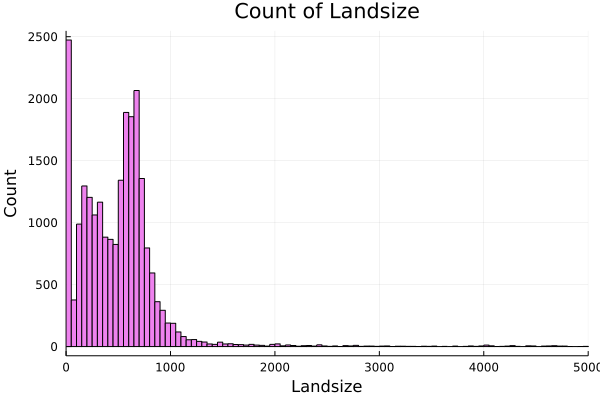

In [25]:
histogram(collect(skipmissing(df[:,:Landsize])), title = "Count of Landsize", xlabel = "Landsize", ylabel = "Count", 
                                legend = :none, color = :Violet, xlim = [0, 5000], fmt = :png)

This is a better result, but it seems like we have a lot of properties with 0 landsize. This is probably from properties which are not houses, most likely apartments. Let's do the histogram one more time by filtering for only houses.

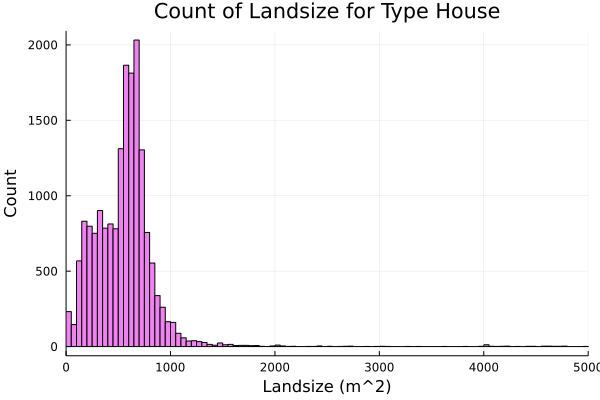

In [26]:
df_houses = filter(:Type => (s -> s=="h"), df);
histogram(collect(skipmissing(df_houses[:,:Landsize])), title = "Count of Landsize for Type House",
            xlabel = "Landsize (m^2)", ylabel = "Count", legend = :none, color = :Violet, xlim = [0, 5000], fmt = :png)

This is now quite informative, although it only includes houses. It seems like most houses have around 700-800 m $^2$ of landsize.

#### Year built

In [27]:
summarystats(df.YearBuilt)

Summary Stats:
Length:         34857
Missing Count:  19306
Mean:           1965.289885
Minimum:        1196.000000
1st Quartile:   1940.000000
Median:         1970.000000
3rd Quartile:   2000.000000
Maximum:        2106.000000


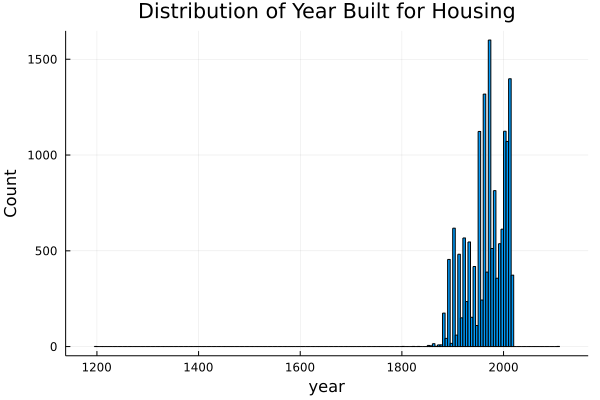

In [28]:
histogram(collect(skipmissing(df.YearBuilt)), title = "Distribution of Year Built for Housing", 
    xlabel = "year", ylabel = "Count", legend = :none, fmt = :png)

As expected, most houses were built in the late 20th and early 21st centuries. It seems like there is one outlier house that was built in 1196, which is extremely unusual. I suspect this could be some kind of error, so I redid the histogram with an xlimit set to above 1800. 

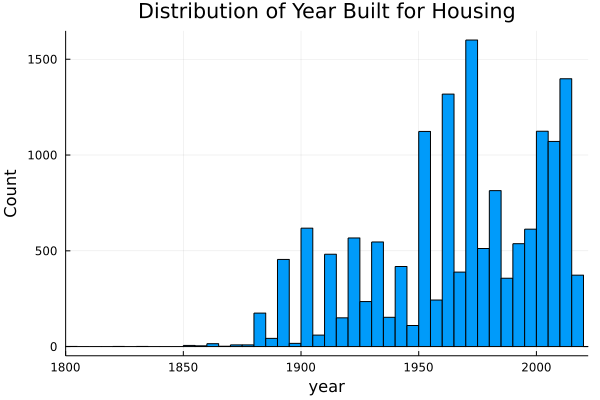

In [29]:
histogram(collect(skipmissing(df.YearBuilt)), title = "Distribution of Year Built for Housing", xlabel = "year", 
            ylabel = "Count", legend = :none, xlims = [1800,2022], fmt = :png)

Cutting off that outlier gives us a better visualisation of house prices. It seems that generally newer houses are sold more often, and this is probably down to the fact that more newer houses exist as the old ones begin to be destroyed. Interestly, certain year brackets such as 1950 have a very high number of houses built that year. Perhaps the construction of these houses was very well done and they have lasted a long time, or maybe these are desirable for other reasons

### Task 1.2

#### Housing price vs distance

We start by seeing how the distance from the CBD affects the price of the house. 

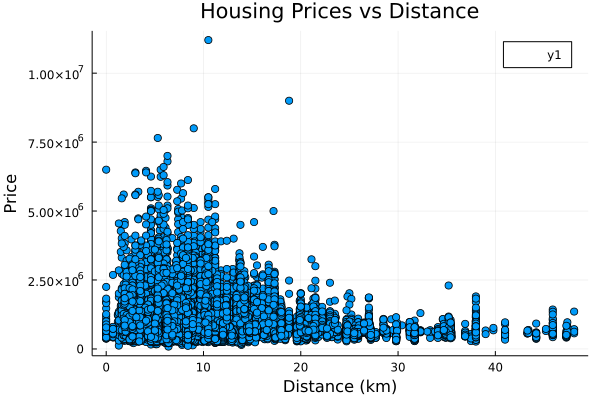

In [30]:
scatter(df.Distance, df.Price, title = "Housing Prices vs Distance", xlabel = "Distance (km)", 
                            ylabel = "Price",fmt = :png)

This graph almost resembles a chi squared probability distribution interestingly enough. It seems that the most valuable houses are around 5 kilometres from the CBD. While one might expect that closer to the city is better, it is likely that inner city residences are quite small, so probably do not sell for that much. Perhaps the ~5 km region has the best balance of house size / convenience. 

#### Price vs Land Size

Noting the issue we had in Part 1.1, we will restrict the landsize to less than 5000 metres. 

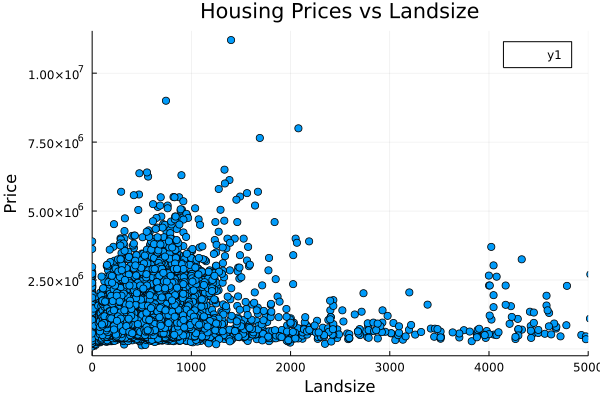

In [32]:
scatter(df.Landsize, df.Price, title = "Housing Prices vs Landsize", xlabel = "Landsize", 
    ylabel = "Price", xlim = [0, 5000],fmt = :png)

Similarly to the previous case for price vs distance, we have data that looks approximately chi squared distributed. Around 700-800 m^2 of landsize seems to be the most popular, with the numbers trailing off as the landsize increases.

#### Price vs Number of Rooms

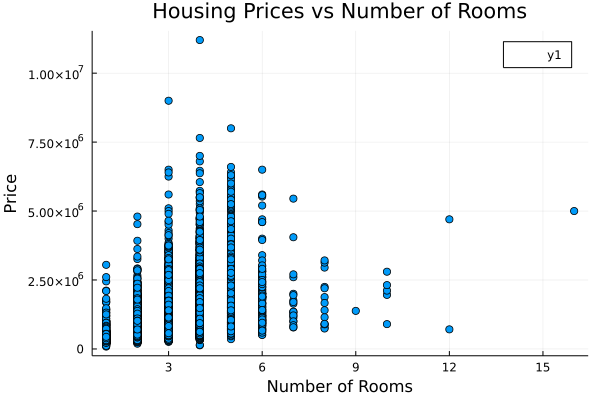

In [33]:
scatter(df.Rooms, df.Price, title = "Housing Prices vs Number of Rooms", xlabel = "Number of Rooms", 
    ylabel = "Price", fmt = :png)

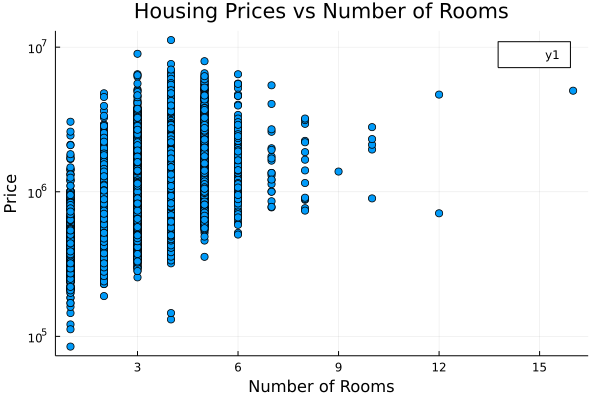

In [34]:
scatter(df.Rooms, df.Price, title = "Housing Prices vs Number of Rooms", xlabel = "Number of Rooms", 
    ylabel = "Price", yaxis = :log,fmt = :png)

#### Housing Price vs Car spaces

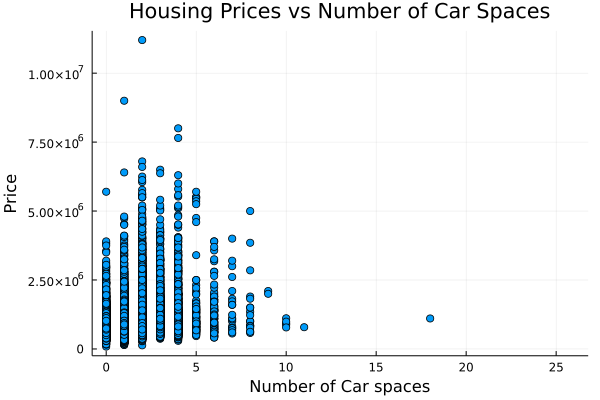

In [35]:
scatter(df.Car, df.Price, title = "Housing Prices vs Number of Car Spaces", xlabel = "Number of Car spaces", 
    ylabel = "Price", legend = :none,fmt = :png)

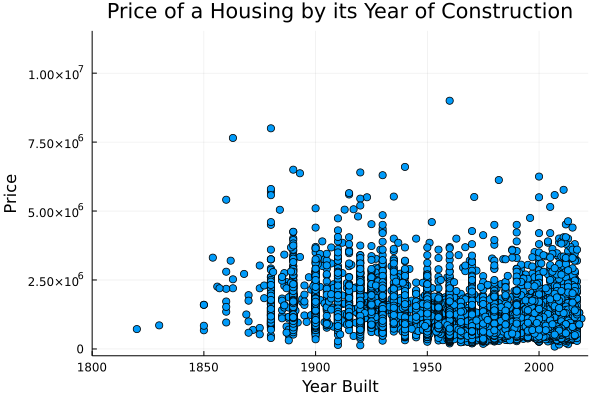

In [36]:
scatter(df.YearBuilt, df.Price, title = "Price of a Housing by its Year of Construction", xlabel = "Year Built", 
            ylabel = "Price", legend = :none, xlims = [1800, 2022], fmt = :png)

Generally, there doesnt seem to be a huge indication of the price of a house based on the year it was built. This could be considered odd since newer houses might be considered more expensive, however they may also be smaller than older homes, which could bring the price down. This scatterplot mainly shows the same result we showed in Part 1, where the number of newer houses being sold far execeeds the number of older houses being sold. 

### Task 1.3

We want to do some time based analysis, so we will make use of the Date column. However it is currently stored as strings as shown below

In [37]:
df.Date[1]

"3/09/2016"

I'm using the Dates package to convert these strings into a DateTime type, which has lots of useful properties for this application. I'm also using this package to extract the Year and Month from each date, which I am putting into a column called :DateYearMonth. This lets do a groupby() on this column later for some aggregate statistics

In [38]:
yearmonthformat = DateFormat("dd/mm/yyyy") # defining a format to read dates with
df = transform(df, :Date => (s -> convert(Vector{String},s)) => :DateType) 
df = transform(df, :DateType => ByRow(s -> (Date(s,yearmonthformat))) => :DateType)
df = transform(df, :DateType => ByRow(s -> Dates.yearmonth(s)) => :DateYearMonth)
df = transform(df, :DateYearMonth => ByRow(s -> Date(s[1],s[2])) => :DateYearMonth);
first(df[:,[:Date, :DateType, :DateYearMonth]],5)

5×3 DataFrame
 Row │ Date       DateType    DateYearMonth 
     │ String15   Date        Date          
─────┼──────────────────────────────────────
   1 │ 3/09/2016  2016-09-03  2016-09-01
   2 │ 3/12/2016  2016-12-03  2016-12-01
   3 │ 4/02/2016  2016-02-04  2016-02-01
   4 │ 4/02/2016  2016-02-04  2016-02-01
   5 │ 4/03/2017  2017-03-04  2017-03-01

We can try just plotting the prices against dates to see if there any interesting trends:

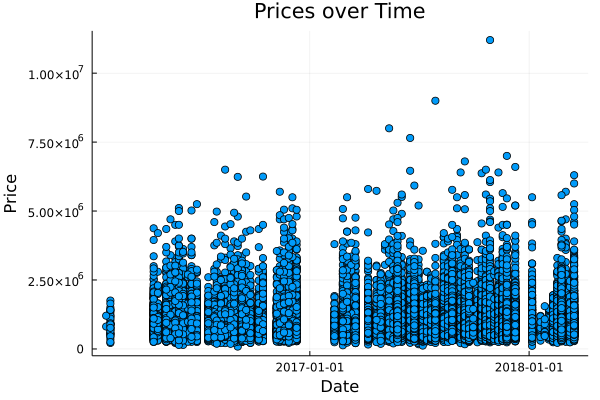

In [39]:
scatter(df.DateType, df.Price, title = "Prices over Time", xlabel = "Date", ylabel = "Price", legend = :none, fmt = :png)

It doesn't seem like there's anything interesting to conclude from here. The volume of data makes a scatterplot like this not useful, since it's hard to see how the results are distributed. Let's try a log graph. 

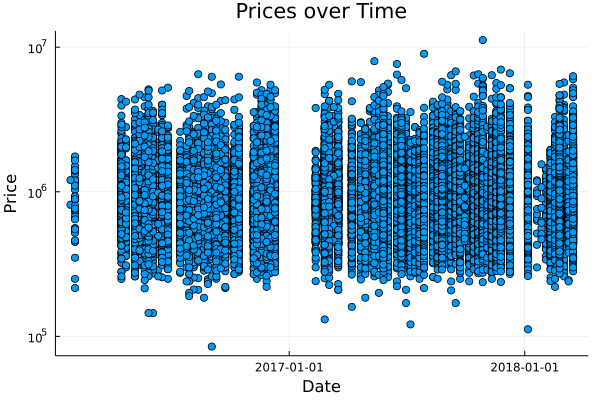

In [40]:
scatter(df.DateType, df.Price, title = "Prices over Time", xlabel = "Date", ylabel = "Price", 
    legend = :none, yaxis = :log, fmt = :png)

On the log graph, the data seems to be very evenly distributed over time, with the mean order of magnitude being around 6. From this, it is again difficult to make any conclusions, so we I will try using some aggregate statistics. we can do analysis grouped by year and month. I am calculating average price, sum of prices, transaction count and proportion of houses by the yearmonth. 

In [41]:
ymgroup = groupby(df, :DateYearMonth)
ymprice = combine(ymgroup, :Price => mean ∘ skipmissing => :PriceYMAverage) # average price
ymtransactions = combine(ymgroup, :Price => sum ∘ skipmissing => :PriceYMSum) # total sales 
df_yearmonth = DataFrames.innerjoin(ymtransactions, ymprice; on = :DateYearMonth)
ymnumber = combine(ymgroup, nrow => :TransactionCountYM) # total transactions
df_yearmonth = DataFrames.innerjoin(df_yearmonth, ymnumber; on = :DateYearMonth)
ymhouseprop = combine(ymgroup, :Type => (s -> count(==("h"),s)/length(s)) => :HouseProportionYM ) # house prop
df_yearmonth = DataFrames.innerjoin(df_yearmonth, ymhouseprop; on = :DateYearMonth)
first(df_yearmonth, 5)

5×5 DataFrame
 Row │ DateYearMonth  PriceYMSum  PriceYMAverage  TransactionCountYM  HousePro ⋯
     │ Date           Int64       Float64         Int64               Float64  ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2016-09-01     1259366750       1.08007e6                1469           ⋯
   2 │ 2016-12-01      890373797       1.16085e6                1000
   3 │ 2016-02-01       31528750       9.00821e5                  44
   4 │ 2017-03-01      964904626       1.14733e6                1110
   5 │ 2016-06-01      998640490       1.03809e6                1242           ⋯
                                                                1 column omitted

We now have a dataframe with all the information we need stored by the Month and Year. We could do a join to attach this to the original dataframe, but there's not a huge need to do that. I've created a vector below that formats the month and date nicely for plotting

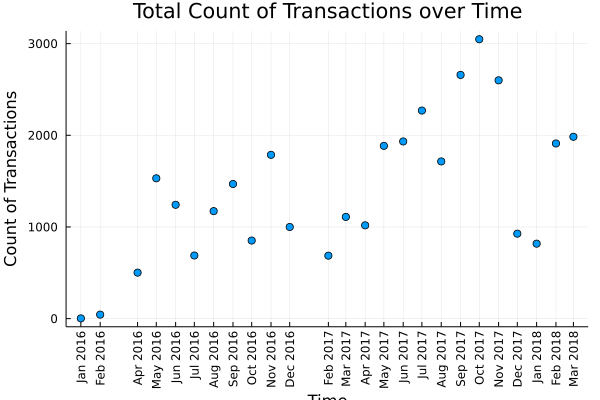

In [43]:
formatmonths = Dates.format.(df_yearmonth.DateYearMonth, "u yyyy");
scatter(df_yearmonth.DateYearMonth, df_yearmonth.TransactionCountYM, 
    title = "Total Count of Transactions over Time",
    xlabel = "Time", ylabel = "Count of Transactions", 
    xticks = (df_yearmonth.DateYearMonth, formatmonths),
    xrotation = 90, legend = :none,fmt = :png)

Our first graph here shows the number of transaction per month over time. The trend here seems to be a linear increase over time, however there is a lot of month to month variability as well. It is also important to note that this is only a couple years of data, and some months are just missing data entirely. Next, let's see if the value of the transactions is changing over time.

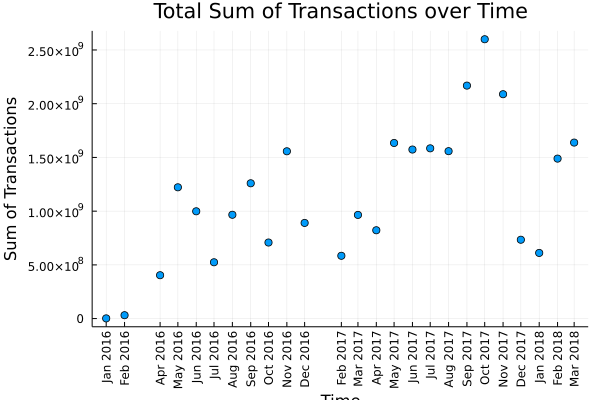

In [44]:

scatter(df_yearmonth.DateYearMonth, df_yearmonth.PriceYMSum, title = "Total Sum of Transactions over Time",
        xlabel = "Time", ylabel = "Sum of Transactions",xticks = (df_yearmonth.DateYearMonth, formatmonths),
        xrotation = 90, legend = :none, fmt = :png)

We see the same kind of trend with the sum of transaction values over time. This leads to me to believe that the average price of housing is not changing that much, otherwise, we would not see the sum and count of transactions follow the same trend. Let's do a plot to confirm it.

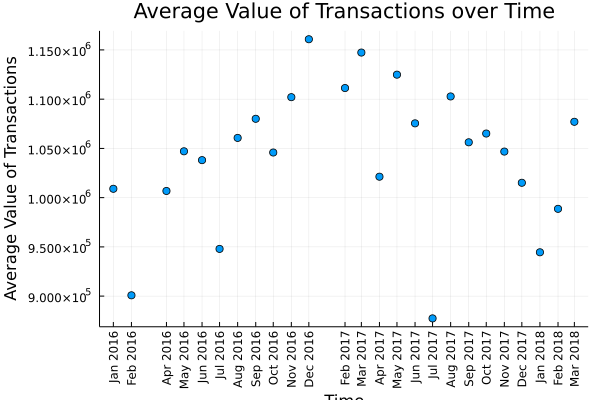

In [45]:
scatter(df_yearmonth.DateYearMonth, df_yearmonth.PriceYMAverage,title = "Average Value of Transactions over Time",
    xlabel = "Time", ylabel = "Average Value of Transactions", 
    xticks = (df_yearmonth.DateYearMonth, formatmonths), xrotation = 90, legend = :none, fmt = :png)

There doesn't seem to be much of a trend here at all. The yaxis in this case is a bit misleading compared to the previous graphs. As can be seen, the values are not changing much, and the slight parabolic shape is probably just the work of some month to month random variance. The final point to consider is how the distribution of houses compared to other properties changes over time:

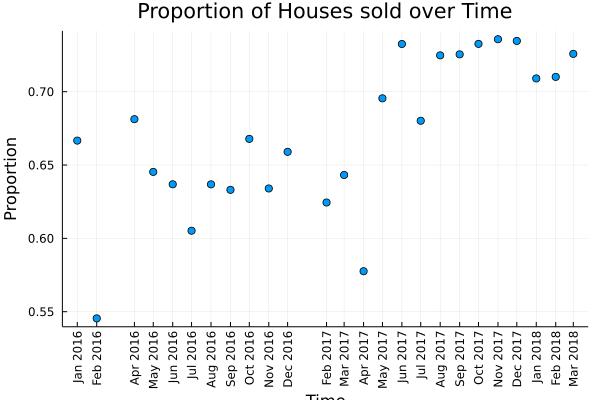

In [46]:
scatter(df_yearmonth.DateYearMonth, df_yearmonth.HouseProportionYM, title = "Proportion of Houses sold over Time",
        xlabel = "Time", ylabel = "Proportion" ,xticks = (df_yearmonth.DateYearMonth, formatmonths),
        xrotation = 90, legend = :none, fmt = :png)

It seems that this proportion also increases over time, from about 0.63 to 0.73 over the span of 2 years. The trend seems to be linear, but obviously the proportion cannot exceed 1, so we will hit a plateua before that value. So, it is difficult to extrapolate anything with this curve. 

### Task 1.4

We are using the GLM to try and fit a linear model onto our data, to see if we can predict the price of a house based on its characterisitics. What I will focus on is the following aspects: the number of rooms, car spaces, year built, distance Let's see which of these are significant or insignificant in determining the value of a property:

In [47]:
lm(@formula(Price ~ Rooms+Car+YearBuilt+Distance+Type+Landsize),df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Price ~ 1 + Rooms + Car + YearBuilt + Distance + Type + Landsize

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────
                      Coef.    Std. Error       t  Pr(>|t|)       Lower 95%       Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────
(Intercept)       7.8346e6       3.0956e5   25.31    <1e-99       7.2278e6        8.44139e6
Rooms             3.2737e5    6590.71       49.67    <1e-99       3.14451e5       3.40289e5
Car           72943.7         5706.41       12.78    <1e-36   61758.1         84129.4
YearBuilt     -3793.77         161.19      -23.54    <1e-99   -4109.74        -3477.81
Distance     -35468.5          849.56      -41.75    <1e-99  -37133.8        -33803.2
Type: t      -43856.0  

Now we can discuss the results of this fitted linear model. We have a variety of variables here so let's discuss each of the. First of all, rooms. According to this linear model, each additional room in the house increases the cost by around 30000 dollars, and there is a very significant p value ($<10^{-99}$). We see a similar trend for the Car variable, with additional car spaces increasing the price by around 73000 dollars. However, the year of construction seems to have a negative effect, with newer houses selling for less money. This was something that wasn't obvious from the graphs previously, but it does make sense since there are far more new houses, they would probably be cheaper typically. As distance increases, price also falls to a significant degree. Now we have a categorical variable: the type. The intercept considers regular houses, and the type "t" and "u" are for townhouses and units respectively. It seems that both of these types cause a downward offset to the price, which is expected since these types of homes are typically less valuable than houses. The Type: t variables has a pvalue of 0.0289, which is the highest we have seen so far but signficiant. Finally, we have the landsize, which adds an extra 30 dollars per square metre. Since most houses typically have hundreds of square metres of landsize, it checks out that the coefficient here is relatively small. 

## Task 3

For this task, I thought the simplest approach would be to use an image of a map of Melbourne, then use this image as a background to plot coordinates onto using a simple scatterplot. I grabbed a screenshot from Google maps, and made sure to note the coordinates of the bottom left and top right corner. Technically, this is not quite right since I'm treating the lattitude and longitude as cartesian coordinates on a flat plane, where in reality the Earth is curved and the latitude and longtitude described angles. However, since I'm looking at a pretty small area compared to the rest of the Earth, this flat earth approximation is good enough. We do not need hyper precise locations for these houses.

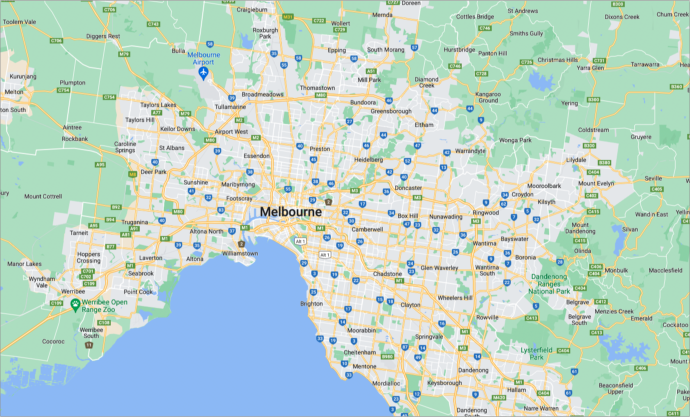

In [48]:
img = load("map.png")

The strategy here is to scale the coordinates given by the data to fit this image when plotted. Loading this image is effectively like loading in a matrix of RGB values, so I use the resolution (i.e. the size) of the image and scale the coordinates accordingly. I have uploaded this gif to this Imgur link : [Link](https://imgur.com/a/HSGGAhL)

In [ ]:
imgdims = size(img) 
fimg = reverse(img, dims = 1) # prevents a problem later with the axis being backwards

# -38.037239, 144.558365 bottom left coordinate from Google maps
# -37.585906, 145.510743 top right coordinate
y1 = -38.037239
y2 = -37.585906 
x1 = 144.558365
x2 = 145.510743

dy = y2 - y1 
dx = x2 - x1

anim = @animate for ymg in ymgroup # grouped by year month 
    ym = Dates.format(ymg.DateYearMonth[1], "U yyyy") #formatting the year to look nice
    pricesum = sum(skipmissing(ymg[:,:Price])) # caclulating sum of sales
    xcoords = (ymg.Longtitude .- x1) .* (imgdims[2]/dx)  # generating scaled x coords
    ycoords = (ymg.Lattitude .- y1) .*  (imgdims[1]/dy) # generating scaled y coords 
    plot(fimg, xlim = [0, imgdims[2]], ylim = [0, imgdims[1]], xflip = false, yflip = false, 
    yticks = :none, yaxis = false, xticks = :none, xaxis = false, legend = :bottomleft,
    title = "Housing Value for " * ym) # ploting the image and setting up bounds
    scatter!(xcoords, ycoords, label = :none) # placing the markers
    scatter!([0],[0], label = " $(pricesum) dollars ", markersize = 0) # label to show price
end

gif(anim, "housing.gif", fps = 0.5) # exporting animation